**Members**
1.   Nguyễn Trọng Thoại - 19522298
2.   Lê Văn Nhân - 19521935
3.   Lê Cao Hưng - 17520539

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datapath = "https://raw.githubusercontent.com/thoithoi58/CS114.L21/main/Colab/Final_Score_Prediction/wecode.csv"
wecode = pd.read_csv(datapath)
datapath = "https://raw.githubusercontent.com/thoithoi58/CS114.L21/main/Colab/Final_Score_Prediction/score_training.csv"
sc_training = pd.read_csv(datapath) 

In [2]:
wc_data = wecode.drop(columns=["id", "language_id", "status", "created_at", "updated_at", "file_name"])
print(wc_data)
sc_training = sc_training[['id','CK']]
sc_training['CK'] = sc_training['CK'].apply(pd.to_numeric, errors='coerce')
print(sc_training)

        assignment_id  problem_id  user_id  is_final  pre_score coefficient
0                   0           3        4         1      10000         100
1                   0           4        4         1      10000         100
2                   0           5        4         0          0         100
3                   0           5        4         0          0         100
4                   0           5        4         0          0         100
...               ...         ...      ...       ...        ...         ...
264601              0          25     1796         0          0         100
264602              0          25     1796         0          0         100
264603              0          25     1796         1      10000         100
264604              0         150      255         1       6250         100
264605             21          24     1568         0      10000         100

[264606 rows x 6 columns]
       id    CK
0      22   8.5
1      24   9.5
2      27  10

**Tìm Total Submit**

In [3]:
Total_Submit = pd.DataFrame({'Total Submit' : wc_data['user_id'].value_counts()})
Total_Submit = Total_Submit.sort_index()
Total_Submit

,Total Submit
1,2
4,54
5,6
6,130
7,5
...,...
1860,76
1862,12
1864,187
1865,99


**Tìm Total Solved**

In [4]:
wc_tsolved = pd.DataFrame(wc_data['user_id'])
wc_tsolved['Total Solved'] = pd.DataFrame(map(int, (wc_data['pre_score'] == 10000) & (wc_data['is_final'] == 1)))
wc_tsolved = wc_tsolved.groupby('user_id').sum()
wc_tsolved

,Total Solved
user_id,
1,1
4,37
5,3
6,85
7,0
...,...
1860,28
1862,4
1864,28


**Tìm Final Score**

In [5]:
wc_fscore = pd.DataFrame(wc_data['user_id'])
wc_fscore['Correct Submits'] = pd.DataFrame(map(int, (wc_data['pre_score'] == 10000)))
wc_fscore['Final Score'] = wc_data.loc[wc_data['is_final'] == 1, ['pre_score']]
wc_fscore = wc_fscore.groupby('user_id').sum()
wc_fscore

,Correct Submits,Final Score
user_id,,
1,1,10000.0
4,44,370000.0
5,3,30000.0
6,89,850000.0
7,0,9209.0
...,...,...
1860,29,329665.0
1862,4,40000.0
1864,30,439741.0


In [6]:
get = pd.DataFrame(wecode['user_id'])
get['Correct Submits'] = pd.DataFrame(map(int, (wc_data['pre_score'] == 10000)))
get = get.groupby('user_id').sum()
get

,Correct Submits
user_id,
1,1
4,44
5,3
6,89
7,0
...,...
1860,29
1862,4
1864,30


**Số lượng Problems có submit**

In [7]:
PHaS = pd.DataFrame(wc_data['user_id'])
PHaS['Problems Have Submit'] = pd.DataFrame(wc_data['is_final'])
PHaS = PHaS.groupby(['user_id']).sum()
PHaS

,Problems Have Submit
user_id,
1,2
4,38
5,5
6,88
7,2
...,...
1860,48
1862,6
1864,63


**Tìm Problems Đã Submit**

In [8]:
Prob_Submit = pd.DataFrame(wc_data['assignment_id'])
Prob_Submit['user_id'] = pd.DataFrame(wc_data['user_id'])
Prob_Submit['Problems Submit'] =  pd.DataFrame(wc_data['problem_id'])
Prob_Submit = Prob_Submit.groupby(['assignment_id', 'user_id']).nunique().reset_index()
Prob_Submit = Prob_Submit.groupby(['user_id']).sum()
Prob_Submit = Prob_Submit.drop(columns= ['assignment_id'])
Prob_Submit

,Problems Submit
user_id,
1,2
4,41
5,5
6,89
7,2
...,...
1860,48
1862,6
1864,63


In [9]:
Data = pd.concat([Total_Submit, Prob_Submit, PHaS, wc_tsolved, wc_fscore], axis=1)
Data = Data.fillna(0.0)
Data

,Total Submit,Problems Submit,Problems Have Submit,Total Solved,Correct Submits,Final Score
1,2,2,2,1,1,10000.0
4,54,41,38,37,44,370000.0
5,6,5,5,3,3,30000.0
6,130,89,88,85,89,850000.0
7,5,2,2,0,0,9209.0
...,...,...,...,...,...,...
1860,76,48,48,28,29,329665.0
1862,12,6,6,4,4,40000.0
1864,187,63,63,28,30,439741.0
1865,99,17,17,10,10,116428.0


**Tính Toán Các Nhóm Ý Kiến**

In [10]:
Calc_Idea = pd.DataFrame()
#O1: Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
Calc_Idea['Opinion 1'] =Data['Total Solved'] / Data['Problems Have Submit']
#O2: Tổng số problem đã sumbit / Tổng số submissions 
Calc_Idea['Opinion 2'] =Data['Problems Have Submit'] / Data['Total Submit']
#O3: Số lần submit đúng (pre_score=10000) / tổng số submissions 
Calc_Idea['Opinion 3'] =Data['Correct Submits'] / Data['Total Submit']
#O5: Tổng pre_score của các submssion có is_final = 1
Calc_Idea['Opinion 5'] = Data['Final Score']
#06: Tổng số submission
Calc_Idea['Opinion 6'] = Data['Total Submit']
Calc_Idea

,Opinion 1,Opinion 2,Opinion 3,Opinion 5,Opinion 6
1,0.500000,1.000000,0.500000,10000.0,2
4,0.973684,0.703704,0.814815,370000.0,54
5,0.600000,0.833333,0.500000,30000.0,6
6,0.965909,0.676923,0.684615,850000.0,130
7,0.000000,0.400000,0.000000,9209.0,5
...,...,...,...,...,...
1860,0.583333,0.631579,0.381579,329665.0,76
1862,0.666667,0.500000,0.333333,40000.0,12
1864,0.444444,0.336898,0.160428,439741.0,187
1865,0.588235,0.171717,0.101010,116428.0,99


In [11]:
stack = pd.concat([Data, Calc_Idea], axis=1)
stack = stack.reset_index()
stack = stack.rename(columns={'index': 'id'})
stack

,id,Total Submit,Problems Submit,Problems Have Submit,Total Solved,Correct Submits,Final Score,Opinion 1,Opinion 2,Opinion 3,Opinion 5,Opinion 6
0,1,2,2,2,1,1,10000.0,0.500000,1.000000,0.500000,10000.0,2
1,4,54,41,38,37,44,370000.0,0.973684,0.703704,0.814815,370000.0,54
2,5,6,5,5,3,3,30000.0,0.600000,0.833333,0.500000,30000.0,6
3,6,130,89,88,85,89,850000.0,0.965909,0.676923,0.684615,850000.0,130
4,7,5,2,2,0,0,9209.0,0.000000,0.400000,0.000000,9209.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1860,76,48,48,28,29,329665.0,0.583333,0.631579,0.381579,329665.0,76
1155,1862,12,6,6,4,4,40000.0,0.666667,0.500000,0.333333,40000.0,12
1156,1864,187,63,63,28,30,439741.0,0.444444,0.336898,0.160428,439741.0,187
1157,1865,99,17,17,10,10,116428.0,0.588235,0.171717,0.101010,116428.0,99


**Merge Data**

In [12]:
sc_train = sc_training.dropna(how='any')
sc_train.head()

,id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5


In [13]:
sc_predict = sc_training[sc_training.isna().any(axis=1)]
sc_predict.head()

,id,CK
19,51,NaN
127,240,NaN
211,391,NaN
292,513,NaN
333,586,NaN


In [14]:
training_data = pd.merge(sc_train, stack, how='inner', on='id')
training_data.head()

,id,CK,Total Submit,Problems Submit,Problems Have Submit,Total Solved,Correct Submits,Final Score,Opinion 1,Opinion 2,Opinion 3,Opinion 5,Opinion 6
0,24,9.5,164,78,77,72,80,750299.0,0.935065,0.469512,0.487805,750299.0,164
1,27,10.0,13,5,5,3,4,39000.0,0.600000,0.384615,0.307692,39000.0,13
2,29,8.5,199,80,80,72,75,762760.0,0.900000,0.402010,0.376884,762760.0,199
3,34,6.5,218,84,84,81,81,822888.0,0.964286,0.385321,0.371560,822888.0,218
4,35,4.5,297,152,151,145,152,1477000.0,0.960265,0.508418,0.511785,1477000.0,297


In [15]:
predict_data = pd.merge(sc_predict, stack, how='inner', on='id')
predict_data.head()

,id,CK,Total Submit,Problems Submit,Problems Have Submit,Total Solved,Correct Submits,Final Score,Opinion 1,Opinion 2,Opinion 3,Opinion 5,Opinion 6
0,51,NaN,86,39,39,38,40,380000.0,0.974359,0.453488,0.465116,380000.0,86
1,240,NaN,623,138,138,126,133,1309761.0,0.913043,0.221509,0.213483,1309761.0,623
2,391,NaN,379,113,113,102,104,1059240.0,0.902655,0.298153,0.274406,1059240.0,379
3,513,NaN,672,139,140,130,135,1319307.0,0.928571,0.208333,0.200893,1319307.0,672
4,586,NaN,296,127,127,123,127,1238947.0,0.968504,0.429054,0.429054,1238947.0,296


**Plot Data**

<function matplotlib.pyplot.show>

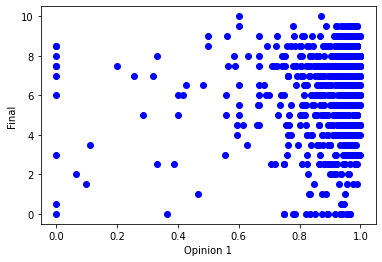

In [16]:
plt.scatter(x=training_data['Opinion 1'],y=training_data['CK'],c='blue')
plt.xlabel('Opinion 1')
plt.ylabel('Final')
plt.show

<function matplotlib.pyplot.show>

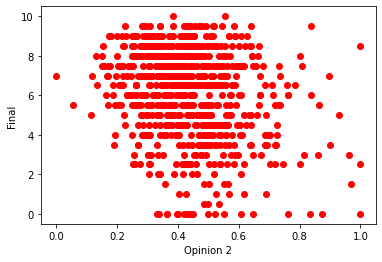

In [17]:
plt.scatter(x=training_data['Opinion 2'],y=training_data['CK'],c='red')
plt.xlabel('Opinion 2')
plt.ylabel('Final')
plt.show

<function matplotlib.pyplot.show>

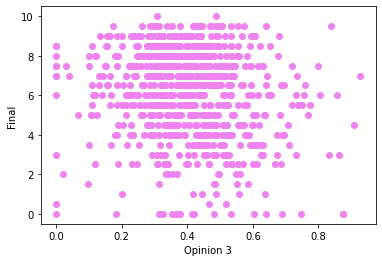

In [18]:
plt.scatter(x=training_data['Opinion 3'],y=training_data['CK'],c='violet')
plt.xlabel('Opinion 3')
plt.ylabel('Final')
plt.show

<function matplotlib.pyplot.show>

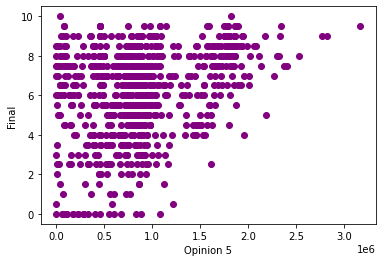

In [19]:
plt.scatter(x=training_data['Opinion 5'],y=training_data['CK'],c='purple')
plt.xlabel('Opinion 5')
plt.ylabel('Final')
plt.show

<function matplotlib.pyplot.show>

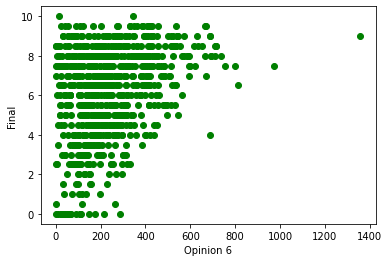

In [20]:
plt.scatter(x=training_data['Opinion 6'],y=training_data['CK'],c='green')
plt.xlabel('Opinion 6')
plt.ylabel('Final')
plt.show